<a href="https://colab.research.google.com/github/saurabh98s/ML_gists/blob/main/HousingPriceMulLinRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print("Feature names:", housing.feature_names)
print("Data shape:", housing.data.shape)
print("Target shape:", housing.target.shape)
print("\nFirst few data points:")
print(housing.data[:3])
print("\nFirst few target values:")
print(housing.target[:3])

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Data shape: (20640, 8)
Target shape: (20640,)

First few data points:
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]]

First few target values:
[4.526 3.585 3.521]


In [13]:

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names

def single_feature_regression():
    X_single = X[:, housing.feature_names.index('MedInc')].reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices')
    plt.plot(X_test, predictions, color='red', label='Predicted Prices')
    plt.title('Linear Regression: House Prices vs Median Income')
    plt.xlabel('Median Income')
    plt.ylabel('House Price (in $100,000s)')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("Single Feature (Median Income) Regression Results:")
    print(f"Coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")



[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [10]:
def multiple_feature_regression():
    X_scaled = StandardScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("\nMultiple Feature Regression Results:")
    print("Feature Coefficients:")
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predicted vs Actual House Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()


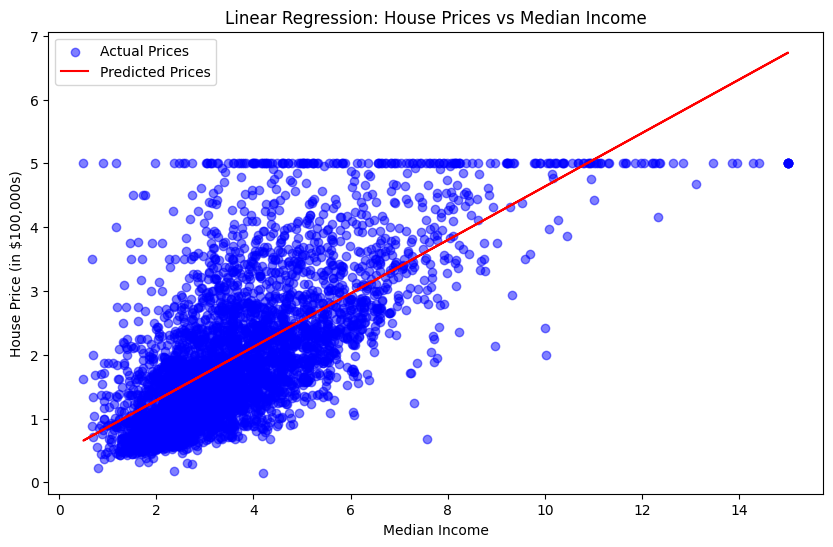

Single Feature (Median Income) Regression Results:
Coefficient (slope): 0.4193
Intercept: 0.4446
Mean Squared Error: 0.7091
R-squared Score: 0.4589


In [11]:
single_feature_regression()



Multiple Feature Regression Results:
Feature Coefficients:
MedInc: 0.8524
HouseAge: 0.1224
AveRooms: -0.3051
AveBedrms: 0.3711
Population: -0.0023
AveOccup: -0.0366
Latitude: -0.8966
Longitude: -0.8689
Intercept: 2.0679
Mean Squared Error: 0.5559
R-squared Score: 0.5758


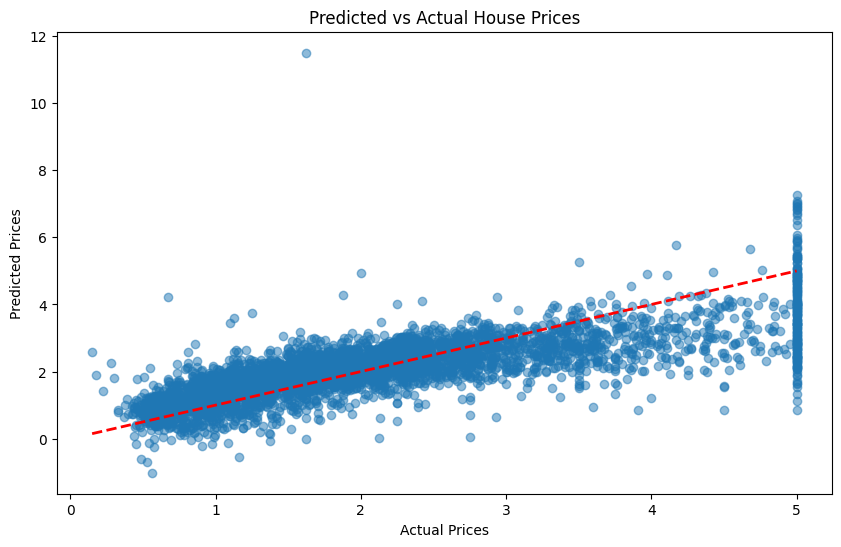

In [12]:
multiple_feature_regression()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


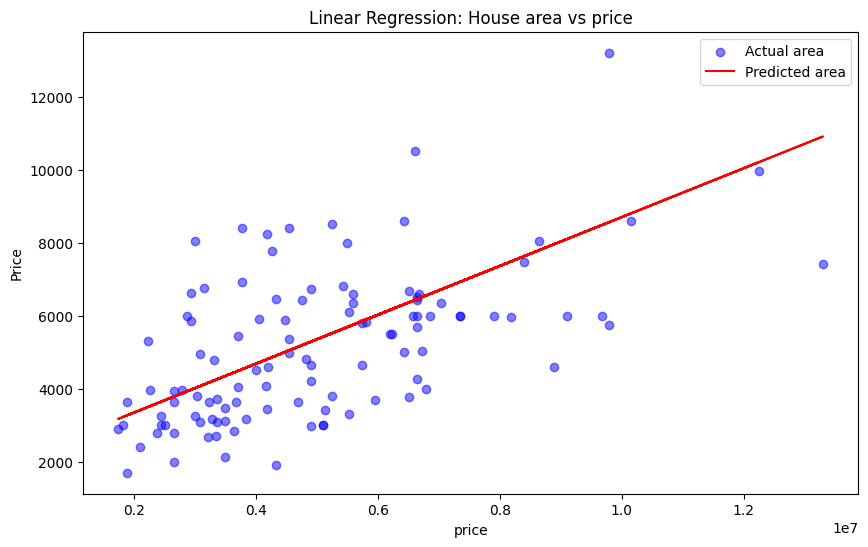


Single Feature (price) Regression Results:
Coefficient (slope): 0.0007
Intercept: 2003.8189
Mean Squared Error: 2935124.1251
R-squared Score: 0.2863

Multiple Feature Regression Results:
Mean Squared Error: 1754318687330.6667
R-squared Score: 0.6529


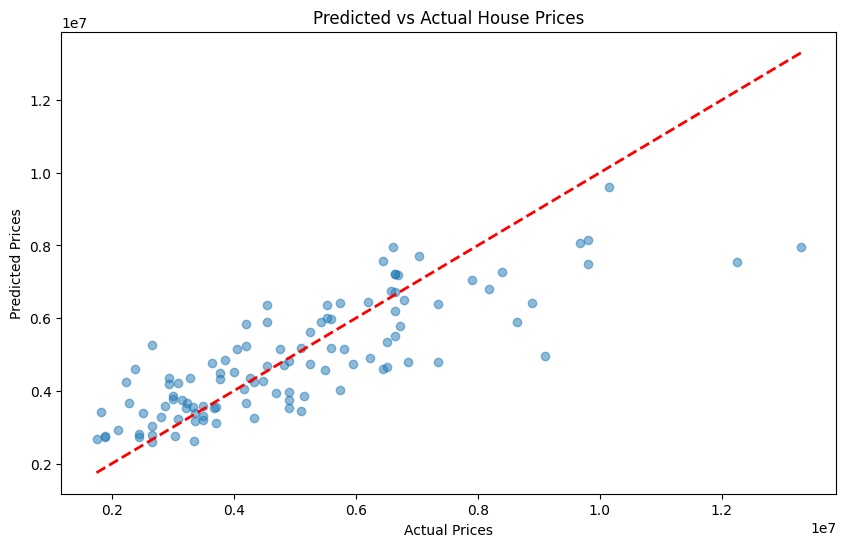


Numerical Feature Importances:
area: 519552.4163
bedrooms: 57349.5594
bathrooms: 521879.0277
stories: 349251.4389
parking: 192005.9537


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

def load_housing_data(file_path):
    df = pd.read_csv(file_path)

    # Print basic information about the dataset
    print("Dataset Information:")
    print(df.info())

    return df

def single_feature_regression(df, feature_column='price', target_column='area'):
    # Select single feature and target
    X = df[[feature_column]]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual area')
    plt.plot(X_test, predictions, color='red', label='Predicted area')
    plt.title(f'Linear Regression: House area vs {feature_column}')
    plt.xlabel(feature_column)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"\nSingle Feature ({feature_column}) Regression Results:")
    print(f"Coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")

def multiple_feature_regression(df):
    numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
    categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                            'airconditioning', 'prefarea', 'furnishingstatus']

    X = df[numerical_features + categorical_features]
    y = df['price']

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline.fit(X_train, y_train)

    predictions = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print("\nMultiple Feature Regression Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r2:.4f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Predicted vs Actual House Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

    feature_importances = pipeline.named_steps['regressor'].coef_
    numerical_importance = feature_importances[:len(numerical_features)]

    print("\nNumerical Feature Importances:")
    for feature, importance in zip(numerical_features, numerical_importance):
        print(f"{feature}: {importance:.4f}")

# Main execution
def main(file_path):
    df = load_housing_data(file_path)
    single_feature_regression(df)
    multiple_feature_regression(df)

main('/content/Housing.csv')
